## **Part 1 Exploratory Data Analysis**
a.  Given the provided dataset can you provide insights on how **request volume** and **Completion Rate (CR = total_completed_trips/total_requests)** changes throughout time? Do you think request volume is an accurate measure of demand?


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

#### **Loading Data**

In [ ]:
df_request = pd.read_csv('/content/drive/My Drive/pathao_assignment/raw_request_dataset.csv')
df_completed = pd.read_csv('/content/drive/My Drive/pathao_assignment/monthly_completed_trip.csv')
df_ride = pd.read_csv('/content/drive/My Drive/pathao_assignment/driver_ride_assignments.csv')


In [ ]:
df_request.shape


(106139, 11)

In [ ]:
df_completed.shape

(4797, 2)

In [ ]:
df_ride.shape

(238559, 2)

In [ ]:
df_request.head()

,day_of_week,Hour,Minute,ride_id,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status
0,1,5,48,78A5RS,4194635,5271687,121.0,NaN,651.0,6077.0,COMPLETED
1,1,7,37,78A9FQ,5390069,3801157,116.0,NaN,1375.0,5733.0,COMPLETED
2,1,7,47,78AACQ,3750224,5102685,194.0,4.0,1566.0,10913.0,COMPLETED
3,1,8,27,78AFLP,4419899,4869168,66.0,1.0,306.0,2430.0,COMPLETED
4,1,8,41,78AIEB,3802452,2928777,130.0,5.0,1088.0,6686.0,COMPLETED


In [ ]:
df_completed.head()

,driver_id,total_monthly_trips
0,4700650,102
1,5160519,336
2,4712145,183
3,5334092,63
4,5124702,274


In [ ]:
df_ride.head()

,ride_id,driver_id
0,78A5D3,4922405
1,78A5D3,5332197
2,78A604,5303157
3,78A604,3355215
4,78A604,5265495


In Data Analysis We will Analyze To Find out the below stuff
* Missing Values
* All The Numerical Variables
* Distribution of the Numerical Variables
* Outliers
* Relationship between independent and dependent feature(SalePrice)

In [ ]:
Hours= list(df_request['Hour'])
Unique_Hours= list(df_request.Hour.unique())
print(len(Hours))
print(Unique_Hours)
print(len(Unique_Hours))

106139
[5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 6, 15, 23, 0, 2, 4, 3, 1]
24


In [ ]:
from itertools import groupby
def Get_total_request(lst1,lst2):
  count=0
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        count+=1
    X.append(count)
    count=0

  return X

In [ ]:
total_requests= Get_total_request(Unique_Hours,Hours)

In [ ]:
print(total_requests)

[1132, 2724, 4783, 8645, 8208, 6674, 6225, 6673, 5997, 6712, 7844, 8242, 7861, 6034, 4800, 2800, 2217, 6243, 1152, 451, 188, 163, 120, 251]


In [ ]:
request_status=list(df_request['status'])
print(len(request_status))

106139


In [ ]:
from itertools import groupby
def Completed_riding_request(lst1,lst2,lst3):
  count=0
  count_comp=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  for i in X:
    Sublst=i
    for j in Sublst:
      if(lst3[j]=="COMPLETED"):
        count+=1
    count_comp.append(count)
    count=0


  return count_comp

In [ ]:
total_completed_trips= Completed_riding_request(Unique_Hours,Hours,request_status)

In [ ]:
print(total_completed_trips)
print(len(total_completed_trips))

[443, 1524, 2639, 4047, 4128, 3725, 3649, 3801, 3246, 3987, 4355, 4471, 4089, 3119, 2328, 1303, 1161, 3695, 464, 143, 51, 66, 42, 62]
24


In [ ]:
Completion_Rate_CR = [ round((i / j), 2) for i, j in zip(total_completed_trips, total_requests)]

In [ ]:
raw_data ={
            'Hour': Unique_Hours,
            'Total_Requests':total_requests,
            'Total_Completed_Trips':total_completed_trips,
            'Completion_Rate_CR':Completion_Rate_CR
            }
df_CR=pd.DataFrame(raw_data,columns=['Hour','Total_Requests','Total_Completed_Trips','Completion_Rate_CR'])

print(df_CR)
print("ok")

    Hour  Total_Requests  Total_Completed_Trips  Completion_Rate_CR
0      5            1132                    443                0.39
1      7            2724                   1524                0.56
2      8            4783                   2639                0.55
3      9            8645                   4047                0.47
4     10            8208                   4128                0.50
5     11            6674                   3725                0.56
6     12            6225                   3649                0.59
7     13            6673                   3801                0.57
8     14            5997                   3246                0.54
9     16            6712                   3987                0.59
10    17            7844                   4355                0.56
11    18            8242                   4471                0.54
12    19            7861                   4089                0.52
13    20            6034                   3119 

## **How request volume changes throughout time -**

Text(0.5, 1.0, 'Total Request Count vs Hours')

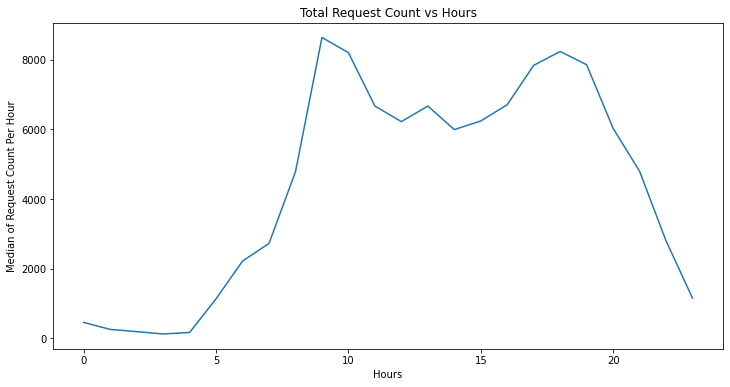

In [ ]:
## Lets analyze  how request volumn changes throughout time
## We will check whether there is a relation between total requests per hour and each hour of the request

fig, axes = plt.subplots(figsize=(12, 6), sharex=True)

df_CR.groupby('Hour')['Total_Requests'].median().plot()
plt.xlabel('Hours')
plt.ylabel('Median of Request Count Per Hour')
plt.title("Total Request Count vs Hours")

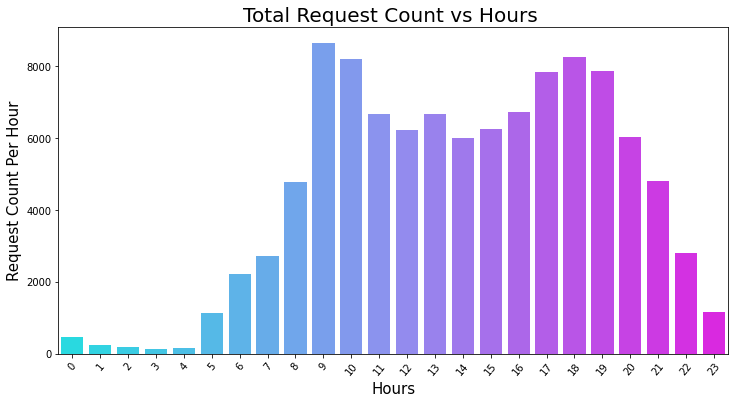

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='Hour',data=df_request, palette='cool')
plt.title("Total Request Count vs Hours ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Request Count Per Hour",fontsize=15)
plt.show()

From the above line-plot and count-plot, we can say that the request volumn differs according to time or hours in a day. Arround 9 and 10 AM the request volumn is high which is low during 1 to 4 AM.

### **How Completion Rate (CR = total_completed_trips/total_requests) changes throughout time -**

Text(0.5, 1.0, 'Completion Rate (CR) vs Hours')

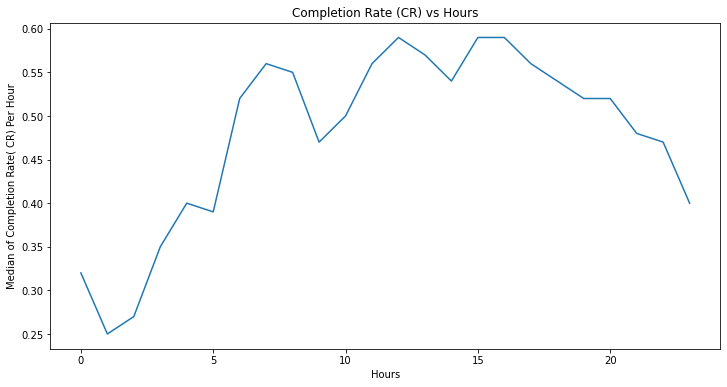

In [ ]:
## Lets analyze how Completion Rate changes throughout time
## We will check whether there is a relation between total Completion Rate and the hour in when the request assigns.

fig, axes = plt.subplots(figsize=(12, 6), sharex=True)

df_CR.groupby('Hour')['Completion_Rate_CR'].median().plot()
plt.xlabel('Hours')
plt.ylabel('Median of Completion Rate( CR) Per Hour')
plt.title("Completion Rate (CR) vs Hours")

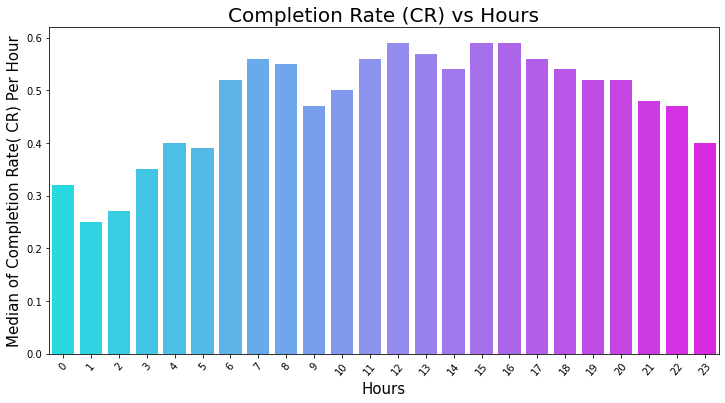

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x='Hour',y='Completion_Rate_CR',data=df_CR, palette='cool')
plt.xticks(rotation=50)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Median of Completion Rate( CR) Per Hour',fontsize=15)
plt.title("Completion Rate (CR) vs Hours",fontsize=20)
plt.show()

From the above line-plot and count-plot, we can say that the Completion Rate(CR) differs according to time or hours in a day. Arround 12, 16 and 17th Hour the completion rate is high which is also low during 1,2 AM.

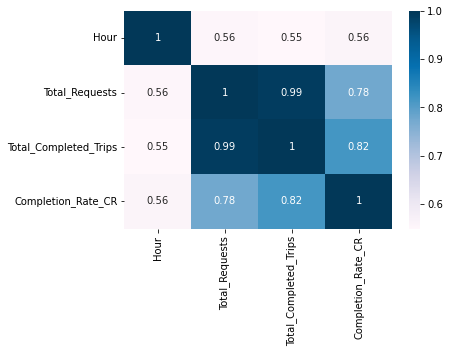

In [ ]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
sns.heatmap(df_CR.corr(), cmap = 'PuBu', annot = True)
plt.show()

## **Do you think request volume is an accurate measure of demand?**

Yes, I think Request Volumn which means hpw many request comes in a particular time is definately an accurate measure of demand. As only by observeing the riding request we can have insight about which particular time in a day a passanger needs a ride in general. According to that the organization can take all the necessary steps to keep the system available

### **Thank You..!**